# Minionology: HVSR with seismic nodes
### Skience2023 practical on HVSR, node installation, applications, Geopsy, continuous data analysis

##### Authors:
* Koen Van Noten ([@KoenVanNoten](https://github.com/KoenVanNoten))
* Thomas Lecocq ([@seismotom](https://github.com/ThomasLecocq)

##### Introduction:
Three-component __seismic nodes__ are conquering the world these days as lightweight smart seismic sensors. This notebook is a simple introduction how to handle seismic node data and perform H/V spectral ratio analysis of ambient noise (mHVSR) recorded with seismic nodes. We'll show you some methods:
* how to perform mHVSR using the Geopsy software manually
* how to do the same exercise automatically 
* and we'll open the discussion towards more automatic solutions given by the Skience2013 crowd. 

SmartSolo 3D Nodes (https://smartsolo.com/cp.php?id=3) are easy to deploy, have long battery life (2-4 weeks), are modular to easily replace battery and are fastly charged. The picture below shows the modular design of the IGU-16HR 3C series where 3C sensors are installed on a standard battery pack (usually used with the 1C nodes). The tripod feet allow them to be used in urban settings. As they resemble to the Minions, we batised _data analysis with nodes_ as __Minionology__. We further refer to Zeckra et al. (submitted) to a technical introduction on the performance of the IGU-16HR 3C series. 

##### References:
* Van Noten, K., Lecocq, T., Goffin, C., Meyvis, B., Molron, J., Debacker, T.N. & Devleeschouwer, X. 2022. Brussels’ bedrock paleorelief from borehole-controlled powerlaws linking polarised H/V resonance frequencies and sediment thickness. _Journal of Seismology_ 26, 35-55. DOI: https://doi.org/10.1007/s10950-021-10039-8 pdf: https://publi2-as.oma.be/record/5626/files/2022_VanNotenetal_HVSR_Powerlaw_Brussels.pdf 
* Van Noten, K, Lecocq, Buddha Power, B. (2020). HVSR to Virtual Borehole (1.0). Zenodo. https://doi.org/10.5281/zenodo.4276310
* Zeckra, M., Van Noten, K., Lecocq, T. Submitted. Sensitivity, Accuracy and Limits of the Lightweight Three-Component SmartSolo Geophone Sensor (5 Hz) for Seismological Applications. _Seismica_. Preprint on: https://doi.org/10.31223/X5F073

<img src="Figures/Minions Seismology.be.jpg" width=600></img>

## Exercise 1:  
## The Paleotopography of the Brabant Massif (bedrock) below Brussels
In the first exercise, we will analyse a dataset recorded in Brussels (Belgium) during a busy Friday in November 2022. Purpose of this data recording is to analyse the variation in (seismic) bedrock depth along a long profile taken in the Tour et Taxis site. In Brussels, many buildings are interested in installing a shallow geothermal well to heat/cool te building. In the city many shallow systems are installed that exploit aquifers in Cenozoic, soft sediment layers. However, the bedrock (London-Brabant Massif) may be as well suitable for geothermal heating/cooling. Our purpose as geophysicist/seismologist is to predict the variation of bedrock depth below buildings using non-destructive ambient noise techniques, which can be implemented in 3D geological models or can be used in a tender towards a drilling company.  

<img src="Figures/TouretTaxis_Brussels.png" width=1200></img>


### Let's start
Activate the necessary modules and run the 00_HVSR_Minionology_definitions.ipynb notebook 

In [2]:
import pandas as pd
import numpy as np
import obspy
import os
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.gridspec as gridspec
from obspy.imaging.scripts.scan import Scanner
from scipy.interpolate import interp1d

# run the HVSR Minionology function notebook
%run 00_HVSR_Minionology_definitions.ipynb

The seismic dataset gathered at the Tour et Taxis site in Brussels can be downloaded here:
__TO DO__

Before playing with the HVSR data, let's have a look on data gathered.

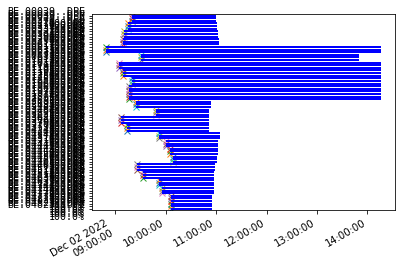

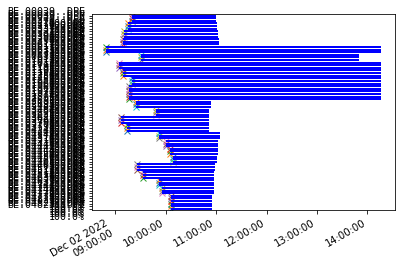

In [2]:
scanner = Scanner()
scanner.parse("HVSR_ex1_Bru")  
scanner.plot()

### 1. Geopsy HVSR dataprocessing
Before processing any data we need perform a manual data analysis in Geopsy first. Download Geopsy from here (https://www.geopsy.org/download.php) and choose your proper platform (Windows, Mac, Linux). Credits to Marc Wathelet & team (ISTerre Grenoble) for years of Geopsy coding, development and improvement. 

We will first manually process the seismic data in Geopsy using the _HV module_ and following standard processing steps. In the Geopsy H/V module use following parameters (also explained here: https://www.geopsy.org/wiki/index.php/H/V_spectral_ratio)
* __Length__: 120s
* __Overlap__: 50%
* __Relative treshhold__: 70%
* __Taper__: 5% Tukey
* __Konno-Omachi smoothing__: 40%
* __Squared Average__
* __Output__: 0.20Hz - 50 Hz
* __Step Count__: 500

After computation, manually clean the H/V curve by _Reject time windows_ (right click on the graph) and select those curves that deviate from the mean curve. Then recompute the H/V curve by pressing the black arrow next to _select_ -> _clear_ -> _Remove grayed_ and press _Start_ again.

To save the .HV results do a _Tools_ -> _Save Results_ and save it in the  __HVSR_ex1_Bru\Analysed__ folder

### 2. Geopsy .hv data reading and plotting
For each node, an .hv file was created using Geopsy. An .hv file contains the values of :
* the "Frequency" versus mean "H/V Amplitude"="Average" values 
* the standard deviation of the HV curve expressed by "Min" and "Max" amplitude

It is easy first to have a look to one .HV file in python. 

In [7]:
# read the HV data. Use the read_HV function.
#read_HV?

HV_file = r'HVSR_ex1_Bru\Analysed\BE_00039.hv'
Freq, A, A_min, A_max = read_HV(HV_file)
print(Freq.head(), A.head(), A_min.head(), A_max.head())

0    0.200886
1    0.205908
2    0.211055
3    0.216332
4    0.221740
Name: Frequency, dtype: float64 0    1.15594
1    1.16388
2    1.17424
3    1.18759
4    1.20362
Name: Average, dtype: float64 0    0.606403
1    0.627787
2    0.651017
3    0.676440
4    0.703548
Name: Min, dtype: float64 0    2.20349
1    2.15775
2    2.11798
3    2.08498
4    2.05913
Name: Max, dtype: float64


* Plot the A0 vs Freq HV curve. 
* Add the error on f0 using a _fill_betweenx_ function
* Scatterplot the f0 value

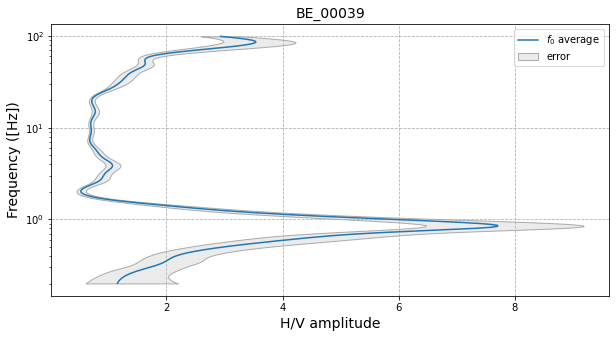

In [4]:
# create the HV plot
fig, ax= plt.subplots(figsize=(10,5))
plt.plot(A, Freq, label='$f_0$ average')
plt.fill_betweenx(Freq, A_min,A_max,facecolor="silver", edgecolor="k", alpha=0.3, label = 'error')
ax.set_yscale('log')
plt.xlabel('H/V amplitude', fontsize = 14)
plt.ylabel('Frequency ([Hz])', fontsize = 14)
plt.legend()
plt.title(os.path.splitext(os.path.split(HV_file)[1])[0], fontsize = 14)
plt.grid(ls='--')

Find the resonance frequency (f0) and its H/V amplitude (A0) from the HV data using the get_params_from_HV_curve()

In [8]:
#get_params_from_HV_curve?
f0_curve, A0_curve, A0_min_curve, A0_max_curve = get_params_from_HV_curve(HV_file)
print(f0_curve, A0_curve, A0_min_curve, A0_max_curve)
print('At %s Hz (f0), the maximum H/V amplitude is %s ± %s'%(round(f0_curve,2), round(A0_curve,1), round(A0_max_curve-A0_curve,1)))

0.841265 7.70717 6.47031 9.18968
At 0.84 Hz (f0), the maximum H/V amplitude is 7.7 ± 1.5


You also can load the information directly from the .hv file

In [9]:
#get_params_from_HV?
f0_avg, f0_win, error, A0, nw_avg, nw_win, f_min, f_max = get_params_from_HV(HV_file)
print(f0_avg, f0_win, error, A0, nw_avg, nw_win, f_min, f_max)

0.841265 0.844764 0.046291 7.707 119.0 119.0 0.798473 0.893738


Sometimes there are multiple peaks in the HV curve. Optionally, we can search for the maximum in the HV curve in a specific frequency range.


In [7]:
#get_params_from_partial_HV_curve?
f_range, A_range, A_min_range, A_max_range = get_params_from_partial_HV_curve(HV_file, 20 , 100)
f_range, A_range, A_min_range, A_max_range

(85.171800000000005, 3.53982, 2.98217, 4.22501)

__Now do it all at once:__

manual: At 0.84 Hz (f0), the maximum H/V amplitude is 7.7 ± 1.5


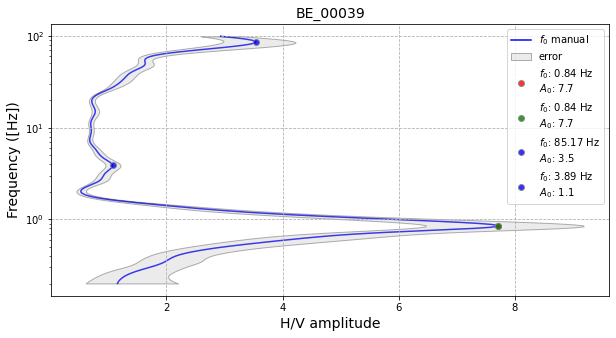

In [12]:
HV_file = r'HVSR_ex1_Bru\Analysed\BE_00039.hv'

# create the plot
fig, ax= plt.subplots(figsize=(10,5))

# get the HV values and plot
Freq, A, A_min, A_max = read_HV(HV_file)
plot_HV(Freq, A, A_min, A_max, f0_curve, A0_curve,  A0_min_curve, A0_max_curve, 'manual', 'blue')

# get the values from the curve and scatterplot
f0_curve, A0_curve, A0_min_curve, A0_max_curve = get_params_from_HV_curve(HV_file)
plt.scatter(A0_curve, f0_curve, c = 'red', edgecolors = 'grey', alpha = 0.8, zorder = 10, 
            label='$f_0$: %s Hz \n$A_0$: %s'%(round(f0_curve,2), round(A0_curve,1)))

# or get the values from the .hv file and scatterplot
f0_avg, f0_win, error, A0, nw_avg, nw_win, f_min, f_max = get_params_from_HV(HV_file)
plt.scatter(A0, f0_win, c = 'green', edgecolors = 'grey', alpha = 0.8, zorder = 10, 
            label='$f_0$: %s Hz \n$A_0$: %s'%(round(f0_curve,2), round(A0_curve,1)))

# or get the values from a partial part of the HV curve and scatterplot
f_range, A_range, A_min_range, A_max_range = get_params_from_partial_HV_curve(HV_file, 20 , 100)
plt.scatter(A_range, f_range, c = 'blue', edgecolors = 'grey', alpha = 0.8, zorder = 10, 
            label='$f_0$: %s Hz \n$A_0$: %s'%(round(f_range,2), round(A_range,1)))

plt.title(os.path.splitext(os.path.split(HV_file)[1])[0], fontsize = 14)
plt.grid(ls='--')
ax.set_yscale('log')
plt.xlabel('H/V amplitude', fontsize = 14)
plt.ylabel('Frequency ([Hz])', fontsize = 14)
plt.legend()

We can now convert the whole HV curve to a __Virtual Borehole__ if the velocity of the soft sediment is known. A virtual borehole is usefull to communicate to general public/geologists etc..

In [9]:
#HV_to_virtual_borehole?

A0: 8.03 fmax:  0.86
Z:  100
bedrock at -13.7  m (range:  -22.7 m,  -5.7 m)



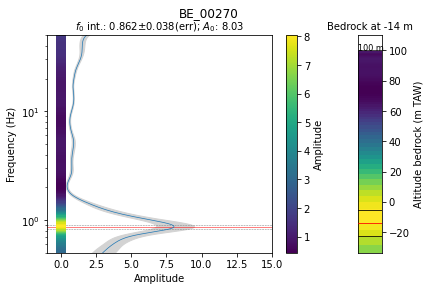

In [21]:
HV_file = r'HVSR_ex1_Bru\Analysed\BE_00270.hv'
Z = 100 # altitude of the measurement

# Figure savefolder
out_folder = 'Figures'

# Choose if you want to use the Geopsy exported values or want to interpolate between 0 and 15000 frequency values
# See annotations in "get_interpolated_values_from_HV for details
interpolate = False

# Choose if the amplitude on the frequency-amplitude plot needs to be selected automatically or manually
auto_amplitude = False
manual_amplitude = 15

# Choose between which frequencies you want to plot. Default = between 0.5 Hz and 50 Hz
freq = [0.5, 50]

## f0 needs to be converted to depth by: 
## e.g. using a Powerlaw relation between resonance frequency and depth according to the formula: depth = a * power(f0, b)
## a & b values of the Regional powerlaw relation (R') of Van Noten et al. 2022.
depth_conversion = 'powerlaw'
a_pw = 88.631     # a value
b_pw = -1.683    # b value

## or by using a fixed velocity
# depth_conversion = 'Vs'
# Vs = 400 # m/s

# apply the function
ID = os.path.split(HV_file)[1].split('.')[0]
HV_to_virtual_borehole(HV_file, ID, Z)

#save it by node name
ID = os.path.split(HV_file)[1].split('.')[0]
savefile = os.path.join(out_folder, '%s_VB.png'%ID)
plt.savefig(savefile, format= 'png', dpi = 300)
print('')

### 3. Reading the HVSR database file
All the node metadata information has been preloaded in an HVSR database file. The HVSR database file is available in the __HVSR_ex1_Bru__ folder.

In [22]:
HV_database = r'HVSR_ex1_Bru\HVSR_database_TouretTaxis.csv'
HV_db_folder, HV_db_name = os.path.split(HV_database)[0], os.path.split(HV_database)[1]
print(HV_db_folder)
print(HV_db_name)

HVSR_ex1_Bru
HVSR_database_TouretTaxis.csv


Load the HVSR database into a pandas database. 

In [23]:
db_HVSR = pd.read_csv(HV_database, encoding='latin')
db_HVSR.head()

,Comment,Device number,H/V,Start,End,Lat,Lon,Lambert-X,Lambert-Y,Z,ID
0,TouretTaxis_HV,453000039,HV01,09:20,11:00,50.865347,4.349856,148669.7449,172774.0343,16.0,BE_00039
1,TouretTaxis_HV,453000270,HV02,09:15,11:01,50.865604,4.349273,148628.7192,172802.6156,16.0,BE_00270
2,TouretTaxis_HV,453000337,HV03,09:11,11:02,50.865861,4.348690,148587.6935,172831.1969,17.0,BE_00337
3,TouretTaxis_HV,453000390,HV04,09:09,11:03,50.866118,4.348107,148546.6678,172859.7781,17.0,BE_00390
4,TouretTaxis_HV,HV6_CS_221202_0916,HV05,09:16,10:52,50.866673,4.347568,148425.9382,172995.9230,17.5,HV6_CS_221202_0916


Compute the distance of each node to the first node using the Obspy _obspy.geodetics.base.gps2dist_azimuth_ function and load it to an array.  

inter_distance = [] 

In [24]:
from obspy.geodetics.base import gps2dist_azimuth 
# gps2dist_azimuth? Obspy info

lat = db_HVSR['Lat']
lon = db_HVSR['Lon']

inter_distances = []
for nr in np.arange(0,len(db_HVSR)-1,1):
    inter_distances.append(gps2dist_azimuth(lat[nr], lon[nr], lat[nr+1],lon[nr+1])[0])
inter_distances = pd.Series(inter_distances)
inter_distances

0     50.002061
1     50.001588
2     50.002444
3     72.534178
4     55.626746
5     55.626256
6     54.994778
7     58.002125
8     57.849547
9     58.002201
10    58.002406
11    58.002567
12    57.948455
13    57.723022
14    57.738118
15    57.963088
16    57.067188
17    57.754722
18    57.996472
19    58.002652
20    58.001897
21    57.969888
22    58.002104
23    58.002038
24    58.002516
25    58.380922
dtype: float64

To later plot the HV profiles with distance, create a cumulative distance series (d_cumul) with _pd.series.cumsum()_

Add a [0] as first distance with pd.concat 

In [25]:
# open a series, but start with distance 0
cumul = pd.Series([0])
# add the cumulative distances to the cumul list
d_cumul = pd.concat([cumul,inter_distances.cumsum()], ignore_index = True)
d_cumul

0        0.000000
1       50.002061
2      100.003650
3      150.006093
4      222.540271
5      278.167018
6      333.793274
7      388.788052
8      446.790176
9      504.639724
10     562.641924
11     620.644331
12     678.646897
13     736.595352
14     794.318375
15     852.056493
16     910.019581
17     967.086769
18    1024.841491
19    1082.837964
20    1140.840616
21    1198.842512
22    1256.812401
23    1314.814504
24    1372.816543
25    1430.819058
26    1489.199980
dtype: float64

Add the cumulative distance column to the pandas dataframe

In [26]:
db_HVSR['d_cumul'] = d_cumul
db_HVSR.head()

,Comment,Device number,H/V,Start,End,Lat,Lon,Lambert-X,Lambert-Y,Z,ID,d_cumul
0,TouretTaxis_HV,453000039,HV01,09:20,11:00,50.865347,4.349856,148669.7449,172774.0343,16.0,BE_00039,0.000000
1,TouretTaxis_HV,453000270,HV02,09:15,11:01,50.865604,4.349273,148628.7192,172802.6156,16.0,BE_00270,50.002061
2,TouretTaxis_HV,453000337,HV03,09:11,11:02,50.865861,4.348690,148587.6935,172831.1969,17.0,BE_00337,100.003650
3,TouretTaxis_HV,453000390,HV04,09:09,11:03,50.866118,4.348107,148546.6678,172859.7781,17.0,BE_00390,150.006093
4,TouretTaxis_HV,HV6_CS_221202_0916,HV05,09:16,10:52,50.866673,4.347568,148425.9382,172995.9230,17.5,HV6_CS_221202_0916,222.540271


### 4. Filling the HVSR database file with .hv data

By using Geopsy, the HVSR data has been saved as .hv files in the _HVSR_ex1_Bru\Analysed_ folder. We will extract and add it to the HVSR database. The script in below (Van Noten _et al._ 2022) reads the HVSR database and extracts all the necessary data in the .hv files being:

* __f0 min__: f0_win/stddev (from GEOPSY)
* __f0_win__: average resonance frequency by taking the f0 of each individual window and averaging all f0 values from these windows (from GEOPSY)
* __f0 avg__: scanning the average curve and identifying the frequency at which the maximum amplitude occurs (from GEOPSY)
* __f0_ip__: resonance frequency computed after interpolating the HV-Amplitude graph using python. This is useful if you forgot to adapt the Step Count
* __f0_ip_diff__: difference between f0_ip and f0_win
* __error__: standard deviation on f0 (from GEOPSY)
* __f0 max__: f0_win.stddev (from GEOPSY)
* __A0__: maximum amplitude (from GEOPSY)
* __nw__: number of windows (from GEOPSY)

Reference:
https://github.com/KoenVanNoten/HVSR_to_virtual_borehole/blob/master/Get%20f0s%20from%20geopsy%20hv%20files.py

In [28]:
# read the database file in which all the names of the .hv measurements are stored
HV_folder = os.path.join(HV_db_folder, 'Analysed')  #folder containing all .hv data

#### Initializing empty columns that need to be filled from the Geopsy .hv files
for _ in ["f0_min", "f0_win", "f0_avg", "f0_int", "f0_int_diff", "error", "f0_max", "A0", "nw"]:
    db_HVSR[_] = 0.

# specify a name for the HVSR + HV params database
out_file = os.path.splitext(HV_db_name)[0] + "_f0_from_hv.csv"

#### loop through each .hv datafile
for id, row in db_HVSR.iterrows():
    HV_file = os.path.join(HV_folder, row["ID"] + ".hv")
    print(HV_file)
    
    # get all params from the HV file
    f0_avg, f0_win, error, A0, nw_avg, nw_win, f_min, f_max = get_params_from_HV(HV_file)
    
    # get interpolated f0 and A0 from the HV file
    f0_int, A0_int, f0_int_diff = get_interpolated_values_from_HV(HV_file, 15000, f0_win)

    #write all data to the database file
    #write_HVline_to_db?
    write_HVline_to_db(db_HVSR, f_min, f0_win, f0_avg, f0_int, f0_int_diff, error, f_max, A0, nw_win)


db_HVSR.to_csv(os.path.join(HV_db_folder, out_file), index = False)


HVSR_ex1_Bru\Analysed\BE_00039.hv
nr of samples: 252
f0_min: 0.798 Hz
f0_win: 0.845 Hz
f0_avg: 0.841 Hz
f0_int: 0.852 Hz
f0_ip_diff: 0.007 Hz
error: 0.046 Hz
f0_max: 0.894 Hz
A0: 7.707
nw: 119 windows

HVSR_ex1_Bru\Analysed\BE_00270.hv
nr of samples: 252
f0_min: 0.83 Hz
f0_win: 0.868 Hz
f0_avg: 0.862 Hz
f0_int: 0.871 Hz
f0_ip_diff: 0.003 Hz
error: 0.038 Hz
f0_max: 0.908 Hz
A0: 8.032
nw: 152 windows

HVSR_ex1_Bru\Analysed\BE_00337.hv
nr of samples: 252
f0_min: 0.853 Hz
f0_win: 0.894 Hz
f0_avg: 0.884 Hz
f0_int: 0.891 Hz
f0_ip_diff: -0.003 Hz
error: 0.041 Hz
f0_max: 0.937 Hz
A0: 7.185
nw: 143 windows

HVSR_ex1_Bru\Analysed\BE_00390.hv
nr of samples: 252
f0_min: 0.823 Hz
f0_win: 0.861 Hz
f0_avg: 0.862 Hz
f0_int: 0.865 Hz
f0_ip_diff: 0.003 Hz
error: 0.038 Hz
f0_max: 0.901 Hz
A0: 9.595
nw: 131 windows

HVSR_ex1_Bru\Analysed\HV6_CS_221202_0916.hv
nr of samples: 252
f0_min: 0.861 Hz
f0_win: 0.896 Hz
f0_avg: 0.906 Hz
f0_int: 0.898 Hz
f0_ip_diff: 0.002 Hz
error: 0.035 Hz
f0_max: 0.932 Hz
A0: 8.5

In [29]:
db_HVSR

,Comment,Device number,H/V,Start,End,Lat,Lon,Lambert-X,Lambert-Y,Z,...,d_cumul,f0_min,f0_win,f0_avg,f0_int,f0_int_diff,error,f0_max,A0,nw
0,TouretTaxis_HV,453000039,HV01,09:20,11:00,50.865347,4.349856,148669.7449,172774.0343,16.0,...,0.000000,0.798473,0.844764,0.841265,0.851507,0.006743,0.046291,0.893738,7.70700,119.0
1,TouretTaxis_HV,453000270,HV02,09:15,11:01,50.865604,4.349273,148628.7192,172802.6156,16.0,...,50.002061,0.830038,0.868200,0.862297,0.871222,0.003022,0.038162,0.908117,8.03189,152.0
2,TouretTaxis_HV,453000337,HV03,09:11,11:02,50.865861,4.348690,148587.6935,172831.1969,17.0,...,100.003650,0.852521,0.893830,0.883854,0.890938,-0.002892,0.041309,0.937142,7.18471,143.0
3,TouretTaxis_HV,453000390,HV04,09:09,11:03,50.866118,4.348107,148546.6678,172859.7781,17.0,...,150.006093,0.823401,0.861160,0.862297,0.864650,0.003490,0.037759,0.900650,9.59490,131.0
4,TouretTaxis_HV,HV6_CS_221202_0916,HV05,09:16,10:52,50.866673,4.347568,148425.9382,172995.9230,17.5,...,222.540271,0.860818,0.895685,0.905951,0.897510,0.001825,0.034867,0.931963,8.53247,156.0
5,TouretTaxis_HV,HV5_CS_221202_1056,HV06,10:56,12:08,50.867007,4.346980,148467.3167,172958.7496,17.9,...,278.167018,0.850174,0.880021,0.883854,0.877794,-0.002227,0.029847,0.910916,8.13516,125.0
6,TouretTaxis_HV,590000633,HV07,09:31,13:55,50.867341,4.346392,148508.6953,172921.5762,18.3,...,333.793274,0.843776,0.886676,0.883854,0.884366,-0.002310,0.042900,0.931758,8.47699,457.0
7,TouretTaxis_HV,453000617,HV08,08:49,14:16,50.867524,4.345666,148374.8548,173016.2865,18.7,...,388.788052,0.818336,0.873609,0.883854,0.877794,0.004185,0.055273,0.932616,7.87366,593.0
8,TouretTaxis_HV,453001013,HV09,09:04,14:16,50.867854,4.345028,148329.9600,173053.0078,19.1,...,446.790176,0.842666,0.883965,0.883854,0.884366,0.000401,0.041299,0.927288,6.92066,592.0
9,TouretTaxis_HV,453001195,HV10,09:09,14:16,50.868198,4.344411,148286.5309,173091.2206,19.5,...,504.639724,0.704579,0.797387,0.820747,0.831791,0.034404,0.092808,0.902420,7.66866,561.0


We can now check how the map looks like and color it by whatever parameter you want. e.g. f0

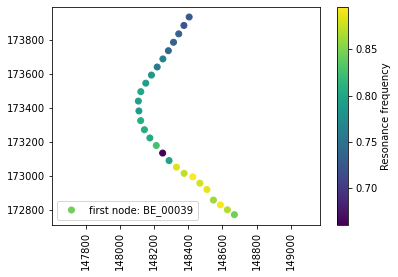

In [31]:
# create the HV plot
fig, ax= plt.subplots()
#Checking how the profile looks like - Use the Belgian Lambert72 projection column 
scatter = plt.scatter(db_HVSR['Lambert-X'], db_HVSR['Lambert-Y'], c=db_HVSR['f0_win'],  cmap = 'viridis', label='first node: %s'%(db_HVSR["ID"][0]))
cb = plt.colorbar(scatter, orientation='vertical')
cb.set_label('Resonance frequency', backgroundcolor = 'white')
ax.axis('equal')
plt.xticks(rotation=90)
plt.legend()

Or plot it in a more interactive way using the python folium module

In [32]:
############# APPLY COLOR TO DATASET

import folium

## todo: link Viridis colors to the db_HVSR['f0_avg'] values, not the order of plotting
import seaborn as sns
palette = sns.color_palette("viridis", len(db_HVSR['f0_win'])).as_hex()
palette.reverse()

# let's plot
m = folium.Map(location=[db_HVSR['Lat'][13], db_HVSR['Lon'][13]], zoom_start=15)

for i,j,k,color in zip(db_HVSR['Lat'], db_HVSR['Lon'], db_HVSR['f0_avg'], palette):
    folium.CircleMarker([i, j],
                 radius = 7,
                        color = 'black',
                        fill=True,
                        fill_color=color,
                        fill_opacity=1,
                        opacity = 0.5
                 ).add_to(m)
m

### 4. Creating an HVSR cross-profile
We want to create an HVSR profile showing the variation of resonance frequency along the profile where the nodes where installed. 

First let's have a look to all HVSR data: 

Text(0, 0.5, 'Frequency ([Hz])')

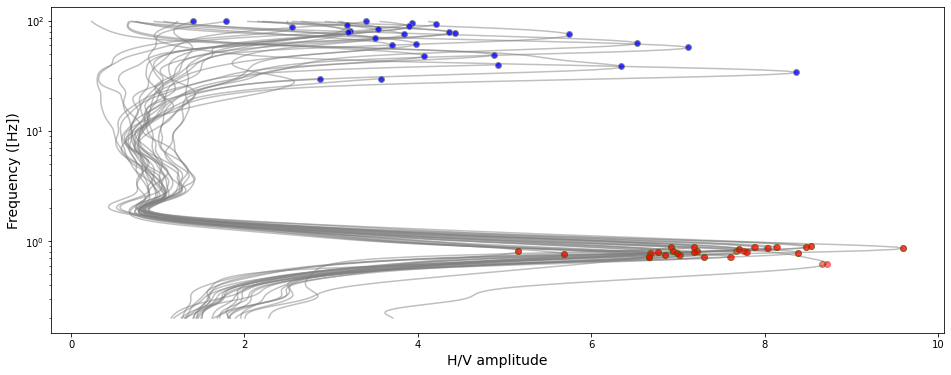

In [34]:
# create plot
fig, ax= plt.subplots(figsize=(16,6))

# We will loop over the HVSR database using pandas groupby to plot each HV profile along the distance. 
for id, group in db_HVSR.groupby("H/V"):
    
    # loop over the .hv files
    for id,line in group.iterrows():
        ID = line.ID + ".hv"
        HV_file = os.path.join(HV_db_folder, 'Analysed', ID)
        
        ### load necessary data
        Freq, A0, A_min, A_max = read_HV(HV_file)
        plt.plot(A0, Freq, c='grey', alpha = 0.5)

        # scatterplot a dot on f0 and A0      
        f0_curve, A0_curve, A0_min_curve, A0_max_curve = get_params_from_HV_curve(HV_file)
        plt.scatter(A0_curve, f0_curve, c = 'red', edgecolors = 'red', alpha = 0.5, zorder = 10, 
            label='$f_0$: %s Hz \n$A_0$: %s'%(round(f0_curve,2), round(A0_max_curve,1)))
        
        # or scatterplot a dot on f0 and A0 from the HV file
        f0_avg, f0_win, error, A0, nw_avg, nw_win, f_min, f_max = get_params_from_HV(HV_file)
        plt.scatter(A0, f0_avg, c = 'red', edgecolors = 'green', alpha = 0.5, zorder = 10 ,
                    label='$f_0$: %s Hz \n$A_0$: %s'%(round(f0_curve,2), round(A0_max_curve,1)))

        # or get the values from a partial part of the HV curve and scatterplot
        f_range, A_range, A_min_range, A_max_range = get_params_from_partial_HV_curve(HV_file, 10 , 100)
        plt.scatter(A_range, f_range, c = 'blue', edgecolors = 'grey', alpha = 0.8, zorder = 10, 
                    label='$f_0$: %s Hz \n$A_0$: %s'%(round(f_range,2), round(A_range,1)))
ax.set_yscale('log')
plt.xlabel('H/V amplitude', fontsize = 14)
plt.ylabel('Frequency ([Hz])', fontsize = 14)

Now, let's make the HVSR profile with distance.

__Strategy__: this profile is made by
* finding the largest amplitude of all HV curves
* normalising all amplitudes to this largest amplitude
* converting the amplitude to distance (hack-solution) so it can be plotted 

__Possibilities__:
We can either make a 
* frequency-distance plot to show the HV curve variation
or convert the HV curve to depth by using:
* a fixed group velocity for the entire soft sediment layer: e.g. Vs = 400 m/s
* or using a powerlaw equation between f0 and depth in the form of h = _a_ * np.power(f0,_b_), with _a_ and _b_ fixed parameters set to a certain area (e.g. by performing HVSR above boreholes with known h)


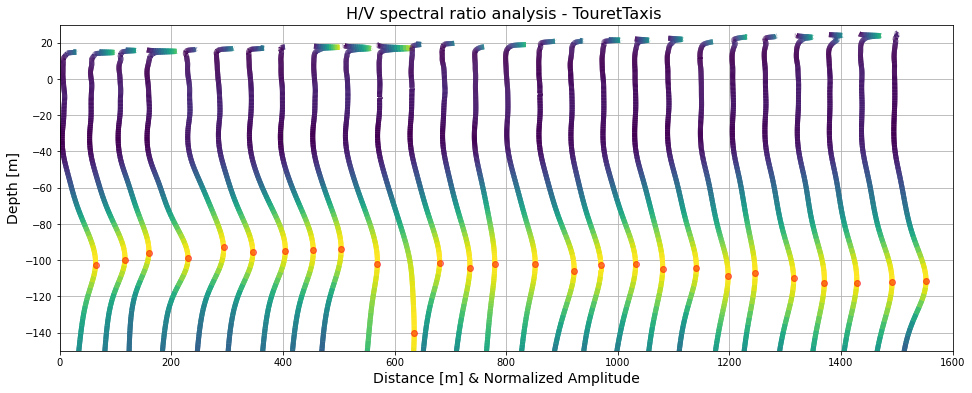

In [45]:
HV_database = r'HVSR_ex1_Bru\HVSR_database_TouretTaxis_f0_from_hv.csv'
db_HVSR = pd.read_csv(HV_database, encoding='latin')

### Choose which profile you want: 
freq_profile = False ## frequency profile of all HVs

depth_profile_fixed = True #depth profile with frequency converted to depth with a fixed velocity 
Vs = 400 #m/s

depth_profile_powerlaw = False #depth profile with frequency converted to depth using a powerlaw equation
a_pw = 88.631     # a value of the powerlaw
b_pw = -1.683    # b value of the powerlaw

### Give the exaggeration value to exaggerate the horizontal scale of the HV plots
### e.g. h_exa = 1 will give virtual boreholes
h_exa = 80

#######################
## Main program
#######################
# create plot
fig, ax= plt.subplots(figsize=(16,6))

# Create empty arrays to get all the HV data
Freqs= []
A0s = []
Amins = []
Amaxs = []
f0s_db = []
A0s_db = []
max_amp = 0
 
# loop over the .hv files
for id, line in db_HVSR.iterrows():
        ID = line.ID + ".hv"
        HV_file = os.path.join(HV_db_folder, 'Analysed', ID)
        
        ### load necessary data
        Freq, A0, A_min, A_max = read_HV(HV_file)
        Freqs.append(Freq)
        A0s.append(A0)
        Amins.append(A_min)
        Amaxs.append(A_max)
        # get the maximum amplitude of all HV files to normalise the max amplitude later
        if A0.max() > max_amp:
            max_amp = A0.max()
        f0s_db.append(line.f0_avg)
        A0s_db.append(line.A0)
        
# Normalise the amplitudes and min and max (to potentially plot the error on f0)
A0s = pd.Series(A0s)/max_amp
Amins = pd.Series(Amins)/max_amp
Amaxs = pd.Series(Amaxs)/max_amp

# create a pandas db for plotting all curves
db_HVs = pd.DataFrame({'Freqs':Freqs, 'A0s':A0s, 'Amins':Amins, 'Amaxs':Amaxs, 
                       'd_cumul':db_HVSR["d_cumul"], 'Z':db_HVSR["Z"]})
for k, _ in db_HVs.iterrows():        
        # convert amplitudes to distances
        arrays = []
        for ar in [_.A0s, _.Amins, _.Amaxs]:
            ar *= h_exa
            ar += _.d_cumul
            arrays.append(ar)
        # if you want a frequency plot y = frequency values        
        if freq_profile:
            y = _.Freqs
        
        # if you want a depth profile with a fixed Vs,  y = Vs / 4*f0            
        if depth_profile_fixed:
            y = Vs / (_.Freqs * 4)
            y= _.Z - y
    
        # if you want a depth profile with a powerlaw conversion,  y = powerlaw            
        if depth_profile_powerlaw:
            y = a_pw * np.power(_.Freqs,b_pw)
            y= _.Z - y
        
        # color the lines
        colorline(arrays[0], y, _.A0s, cmap='viridis', linewidth=5)
        colorbar = colorline(arrays[0], y, _.A0s, cmap='viridis', linewidth=5)        
        
        # scatterplot a dot on f0 and A0
        Amax_f0 = np.max(arrays[0])
        Fmax_f0 = y[np.argmax(arrays[0])]
        plt.scatter(Amax_f0, Fmax_f0, c = 'red', edgecolors = 'red', alpha = 0.5, zorder = 10)

plt.gca().invert_yaxis()
plt.ylim(0.5,100)

if freq_profile:
        plt.ylabel("Frequency [Hz]",  fontsize=14)
        ax.set_yscale('log')
else:
        plt.ylabel("Depth [m]",  fontsize=14)
        plt.ylim(-150,30)

plt.xlabel("Distance [m] & Normalized Amplitude",  fontsize=14)
id = '%s '%(db_HVSR["Comment"][0].split('_')[0])
plt.title('H/V spectral ratio analysis - %s'%id,  fontsize=16)
plt.xlim(0,1600)
plt.grid()
plt.savefig('Figures/HVSR_profile_Brussels.png', dpi=150)

Alternatively, we also can make a virtual borehole for each individual measurement loading each .hv file from the database and save it as a Virtual Borehole. 

BE_00039
A0: 7.71 fmax:  0.84
Z:  16.0
bedrock at -102.6  m (range:  -114.4 m,  -92.3 m)


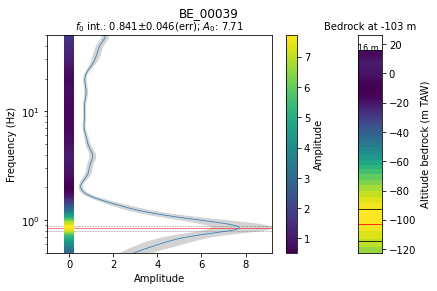

BE_00270
A0: 8.03 fmax:  0.86
Z:  16.0
bedrock at -97.7  m (range:  -106.7 m,  -89.7 m)


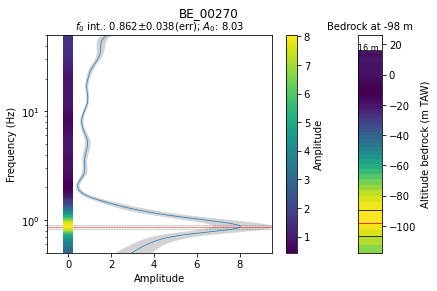

BE_00337
A0: 7.19 fmax:  0.88
Z:  17.0
bedrock at -92.1  m (range:  -101.3 m,  -84.0 m)


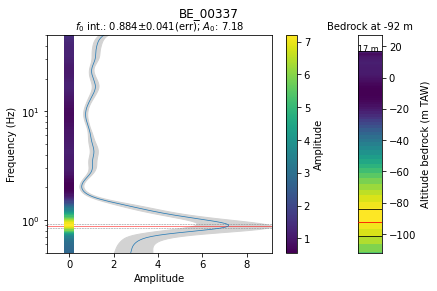

BE_00390
A0: 9.6 fmax:  0.86
Z:  17.0
bedrock at -96.7  m (range:  -105.6 m,  -88.8 m)


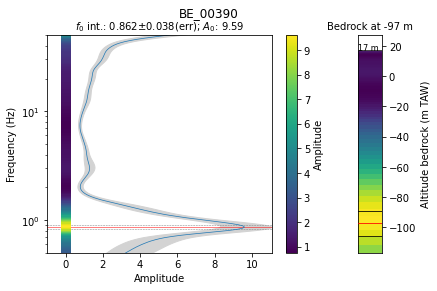

HV6_CS_221202_0916
A0: 8.54 fmax:  0.91
Z:  17.5
bedrock at -87.2  m (range:  -94.3 m,  -80.7 m)


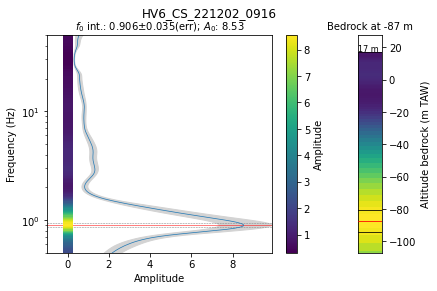

HV5_CS_221202_1056
A0: 8.14 fmax:  0.88
Z:  17.9
bedrock at -91.2  m (range:  -97.7 m,  -85.3 m)


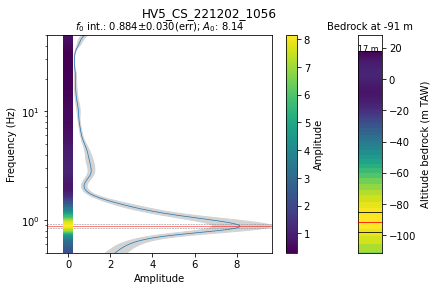

BE_00633
A0: 8.48 fmax:  0.88
Z:  18.3
bedrock at -90.8  m (range:  -100.3 m,  -82.4 m)


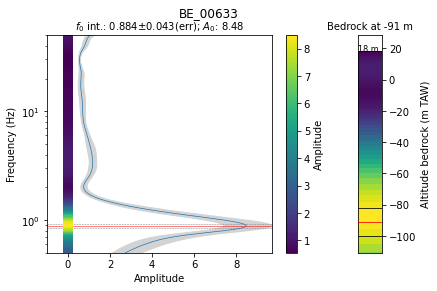

BE_00617
A0: 7.88 fmax:  0.88
Z:  18.7
bedrock at -90.4  m (range:  -102.9 m,  -79.8 m)


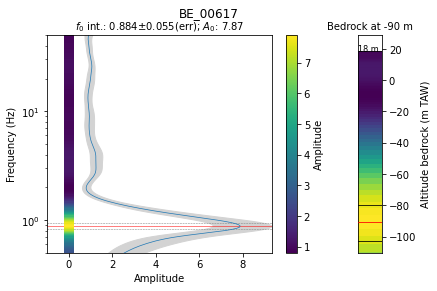

BE_01013
A0: 6.92 fmax:  0.88
Z:  19.1
bedrock at -90.0  m (range:  -99.2 m,  -81.9 m)


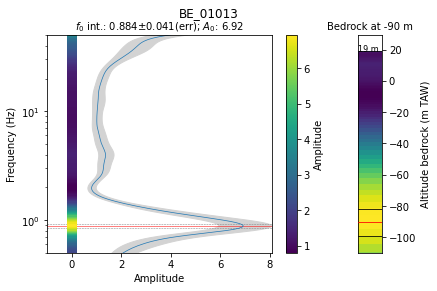

BE_01195
A0: 7.77 fmax:  0.82
Z:  19.5
bedrock at -104.1  m (range:  -131.7 m,  -83.7 m)


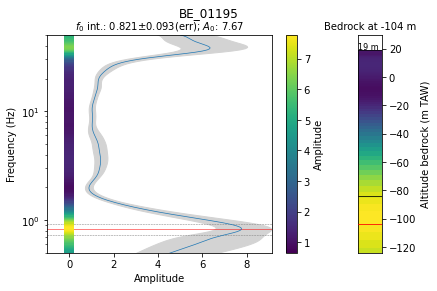

BE_01250
A0: 8.73 fmax:  0.63
Z:  19.9
bedrock at -175.3  m (range:  -254.8 m,  -127.1 m)


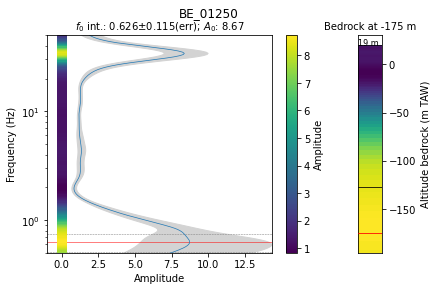

BE_01960
A0: 7.22 fmax:  0.82
Z:  20.3
bedrock at -103.3  m (range:  -113.9 m,  -94.0 m)


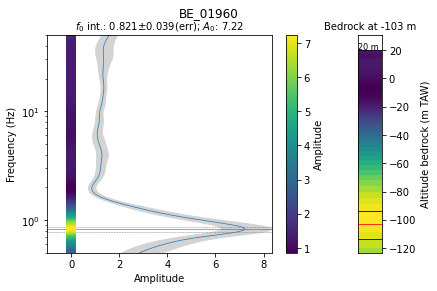

BE_01974
A0: 6.77 fmax:  0.8
Z:  20.7
bedrock at -108.1  m (range:  -124.7 m,  -94.4 m)


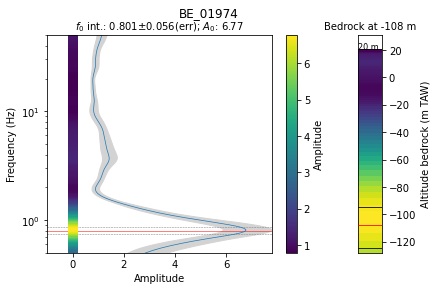

BE_02695
A0: 5.16 fmax:  0.81
Z:  21.1
bedrock at -105.2  m (range:  -120.0 m,  -92.8 m)


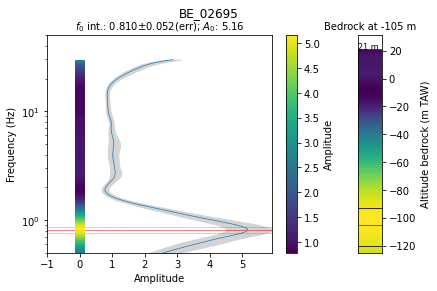

BE_03484
A0: 6.94 fmax:  0.81
Z:  21.5
bedrock at -105.1  m (range:  -115.2 m,  -96.2 m)


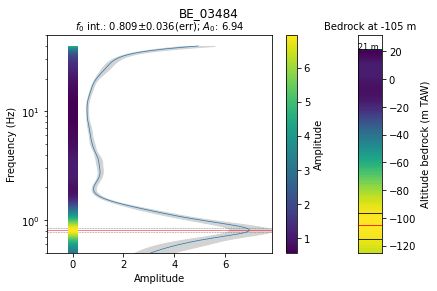

BE_03625
A0: 8.39 fmax:  0.78
Z:  21.9
bedrock at -112.4  m (range:  -123.0 m,  -103.0 m)


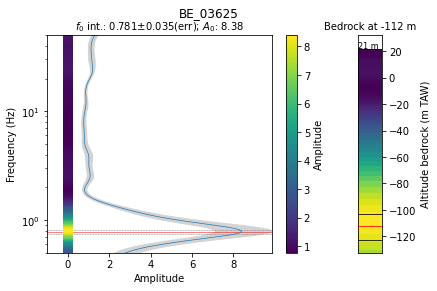

BE_03798
A0: 7.19 fmax:  0.8
Z:  22.3
bedrock at -106.5  m (range:  -115.5 m,  -98.4 m)


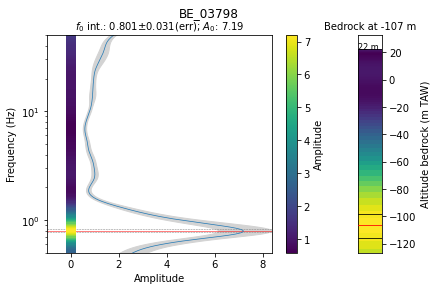

BE_04248
A0: 7.8 fmax:  0.8
Z:  22.7
bedrock at -106.1  m (range:  -117.2 m,  -96.4 m)


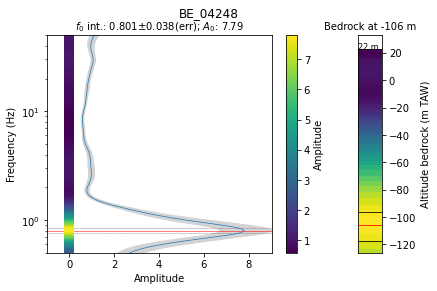

BE_04316
A0: 6.69 fmax:  0.78
Z:  23.1
bedrock at -111.2  m (range:  -125.9 m,  -98.7 m)


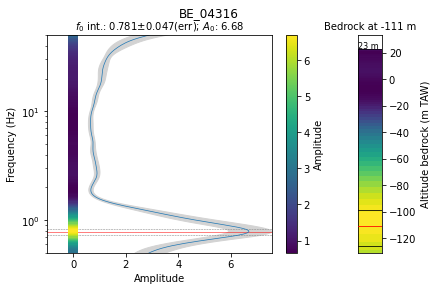

BE_04444
A0: 6.99 fmax:  0.78
Z:  23.5
bedrock at -110.8  m (range:  -123.7 m,  -99.6 m)


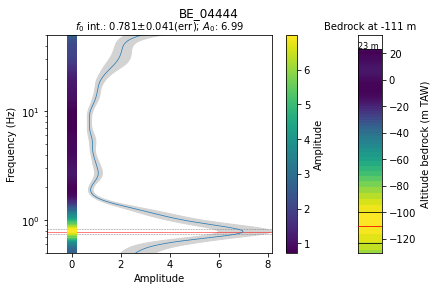

BE_04450
A0: 6.85 fmax:  0.76
Z:  23.9
bedrock at -118.2  m (range:  -128.4 m,  -109.1 m)


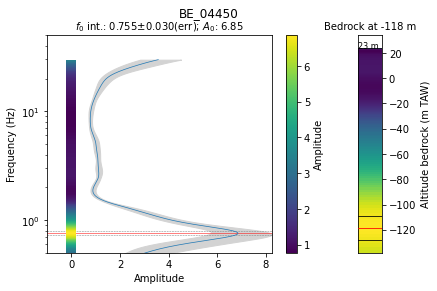

BE_04465
A0: 5.69 fmax:  0.76
Z:  24.3
bedrock at -115.7  m (range:  -130.2 m,  -103.3 m)


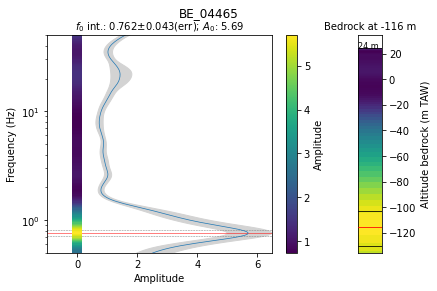

BE_04512
A0: 7.02 fmax:  0.74
Z:  24.7
bedrock at -121.2  m (range:  -131.8 m,  -111.7 m)


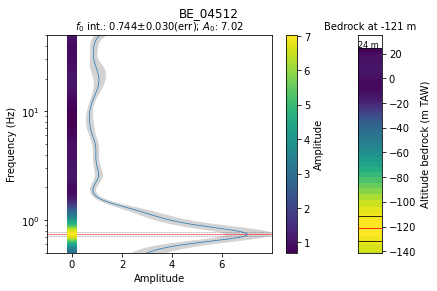

BE_04639
A0: 6.67 fmax:  0.73
Z:  25.1
bedrock at -127.0  m (range:  -139.7 m,  -115.9 m)


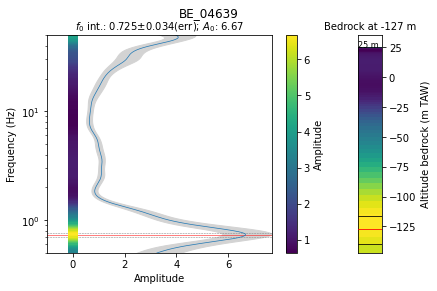

BE_04744
A0: 6.67 fmax:  0.73
Z:  25.5
bedrock at -126.6  m (range:  -136.8 m,  -117.4 m)


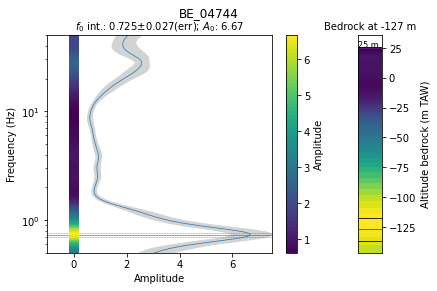

BE_04778
A0: 7.3 fmax:  0.73
Z:  25.9
bedrock at -126.2  m (range:  -138.0 m,  -115.7 m)


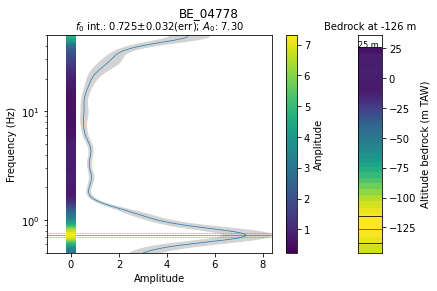

BE_04823
A0: 7.61 fmax:  0.73
Z:  26.3
bedrock at -125.8  m (range:  -135.2 m,  -117.3 m)


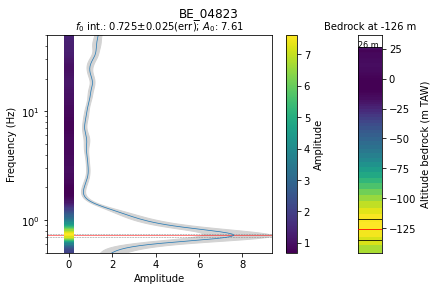

In [59]:
# ### Load the HVSR data and the database csv overview file from the folder
HV_database = r'HVSR_ex1_Bru\HVSR_database_TouretTaxis_f0_from_hv.csv'

# Datafolder with HV files
in_folder = 'HVSR_ex1_Bru\Analysed'

# Plot only one Virtual Borehole with the ID given (ID & .hv file need to be in the database file)
# If plot_one = 0; all .hv files will be plotted as a Virtual Borehole
plot_one = False
HV = 'BE_00039'

# Choose if you want to use the Geopsy exported values or want to interpolate between 0 and 15000 frequency values
# See annotations in "get_interpolated_values_from_HV for details
interpolate = False

# Choose if the amplitude on the frequency-amplitude plot needs to be selected automatically or manually
auto_amplitude = True
manual_amplitude = 20

# Choose between which frequencies you want to plot. Default = between 0.5 Hz and 50 Hz
freq = [0.5, 50]

## f0 needs to be converted to depth by: 
## e.g. using a Powerlaw relation between resonance frequency and depth according to the formula: depth = a * power(f0, b)
## a & b values of the Regional powerlaw relation (R') of Van Noten et al. 2022.
depth_conversion = 'powerlaw'
a_pw = 88.631     # a value
b_pw = -1.683    # b value
'''
## or by using a fixed velocity
depth_conversion = 'Vs'
Vs = 400 # m/s
'''

## wanna and/or save or plot the data?
plot = True
save = False
out_folder = 'Figures'

######################################
## Run Program
######################################

# Find filename from ID nr & convert 1 HVSR
db_HVSR = pd.read_csv(HV_database, encoding='latin', index_col = 'ID')

## Loop over files
if plot_one:
    Z = db_HVSR.loc[HV].Z
    HV_file = os.path.join(in_folder, HV +'.hv')
    print (HV_file)
    # apply the function
    HV_to_virtual_borehole(HV_file, HV, Z)
    
    if save:
        #save it by node name
        savefile = os.path.join(out_folder, '%s_VB.png'%HV)
        plt.savefig(savefile, format= 'png', dpi = 300)
        print('')
    if plot:
        plt.show()
    
# plot all HVSR data
else:
    Z = db_HVSR['Z']
    for i,j in zip(db_HVSR.index,Z):
        print(i)
        HV_file = os.path.join(in_folder, i + '.hv')
        HV_to_virtual_borehole(HV_file, i, j)
        
        if save:
            #save it by node name
            savefile = os.path.join(out_folder, '%s_VB.png'%i)
            plt.savefig(savefile, format= 'png', dpi = 300)
            print('')

        if plot:
            plt.show()